   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

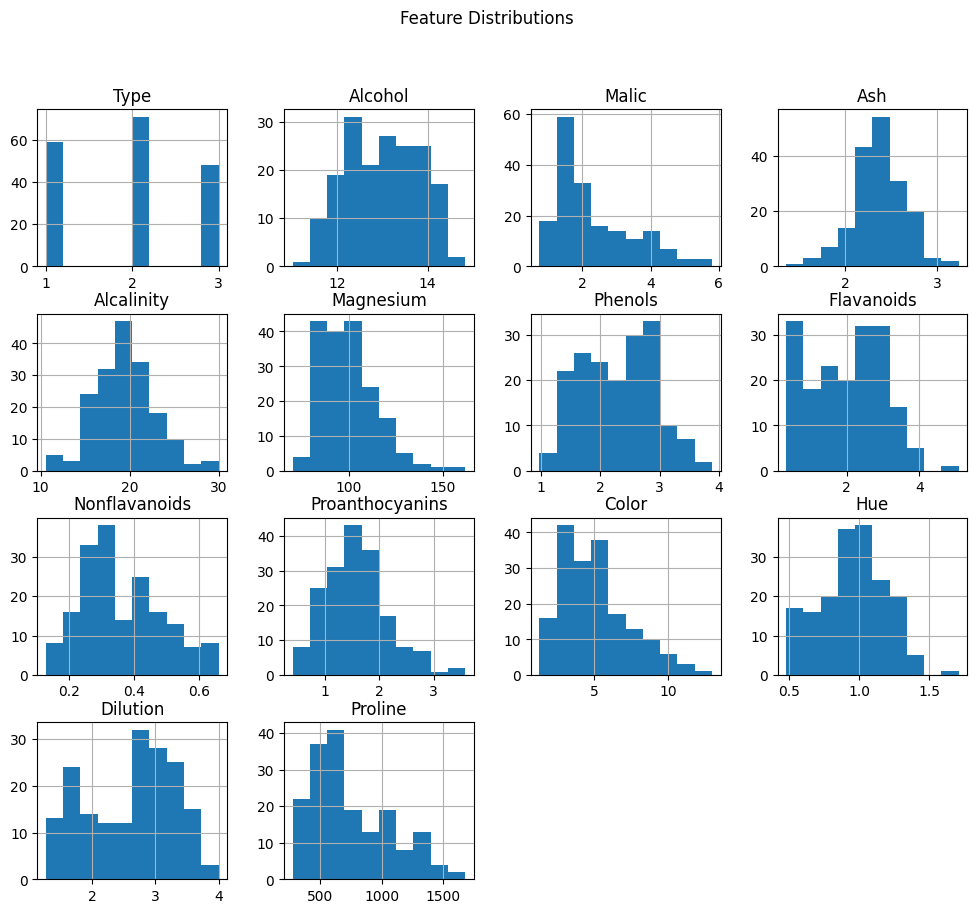

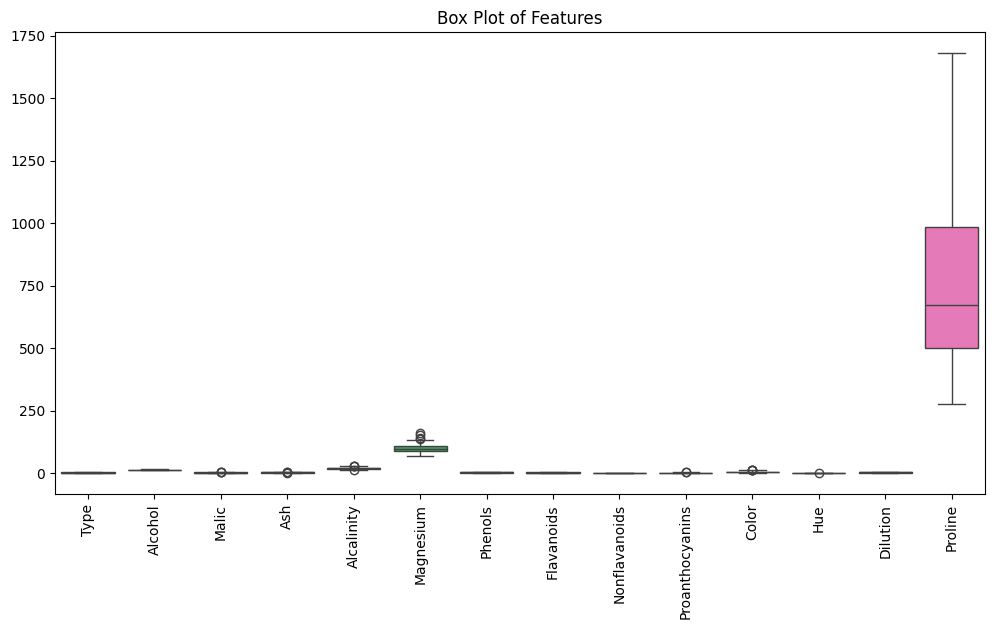

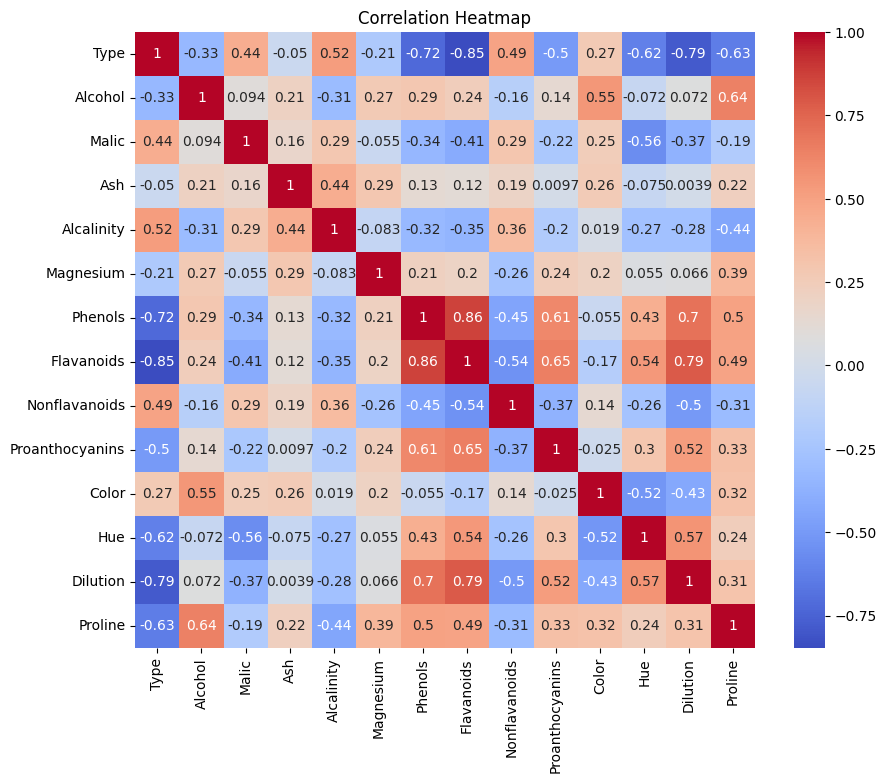

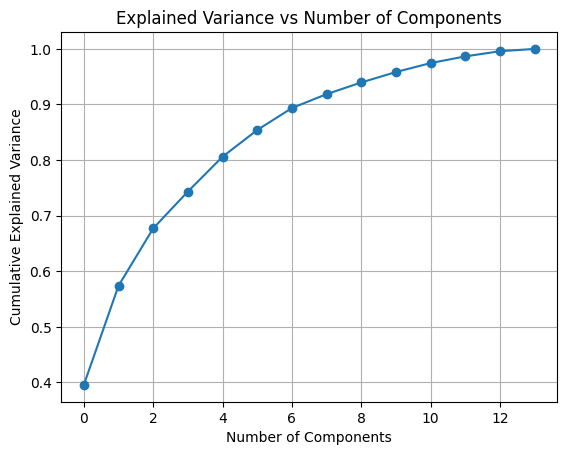

        PC1       PC2
0 -3.522934  1.453098
1 -2.528858 -0.330019
2 -2.785029  1.036936
3 -3.922588  2.768210
4 -1.407511  0.867773
Silhouette Score (Original): 0.30648398324833453
Davies-Bouldin Index (Original): 1.315707552261773
Silhouette Score (PCA): 0.6024415520362845
Davies-Bouldin Index (PCA): 0.5397078562575711


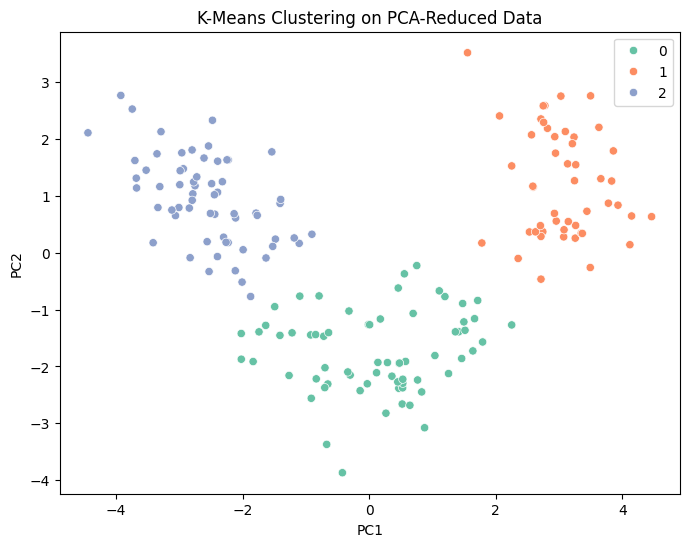

          Method  Silhouette Score  Davies-Bouldin Index
0  Original Data          0.306484              1.315708
1       PCA Data          0.602442              0.539708


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
df = pd.read_csv("wine.csv")
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
df.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plot of Features")
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid()
plt.show()
pca = PCA(n_components=2)
pca_final = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_final, columns=["PC1", "PC2"])
print(pca_df.head())
kmeans_original = KMeans(n_clusters=3, random_state=42)
original_labels = kmeans_original.fit_predict(scaled_data)
print("Silhouette Score (Original):", silhouette_score(scaled_data, original_labels))
print("Davies-Bouldin Index (Original):", davies_bouldin_score(scaled_data, original_labels))
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_labels = kmeans_pca.fit_predict(pca_df)
print("Silhouette Score (PCA):", silhouette_score(pca_df, pca_labels))
print("Davies-Bouldin Index (PCA):", davies_bouldin_score(pca_df, pca_labels))
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_df["PC1"],
    y=pca_df["PC2"],
    hue=pca_labels,
    palette="Set2"
)
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.show()
comparison = pd.DataFrame({
    "Method": ["Original Data", "PCA Data"],
    "Silhouette Score": [
        silhouette_score(scaled_data, original_labels),
        silhouette_score(pca_df, pca_labels)
    ],
    "Davies-Bouldin Index": [
        davies_bouldin_score(scaled_data, original_labels),
        davies_bouldin_score(pca_df, pca_labels)
    ]
})

print(comparison)


# 1. Summary of Key Findings and Insights:
        In this analysis, Exploratory Data Analysis (EDA) helped in understanding the distribution, spread, and relationships among features in the dataset. The correlation analysis revealed that some features were highly correlated, indicating redundancy in the data.

        Principal Component Analysis (PCA) successfully reduced the dimensionality of the dataset while retaining most of the important information (variance). By selecting an optimal number of principal components, the dataset was transformed into a lower-dimensional space, making it easier to visualize and process.

        Clustering performed on the original dataset and PCA-transformed dataset produced comparable results. However, clustering on PCA-reduced data often showed improved cluster separation and better visualization. Evaluation metrics such as Silhouette Score and Davies–Bouldin Index indicated that PCA-based clustering can enhance clustering performance by reducing noise and redundant features.

# 2. Practical Implications of Using PCA and Clustering in Data Analysis

        PCA is highly useful in real-world data analysis when working with high-dimensional datasets. It helps reduce computational complexity, removes multicollinearity, and improves model efficiency without significantly losing information. PCA also enables effective data visualization by projecting complex datasets into two or three dimensions.

        Clustering techniques such as K-means are widely used to identify hidden patterns or natural groupings in data. When combined with PCA, clustering becomes more efficient and interpretable, especially for large datasets.

        In practical applications such as customer segmentation, medical data analysis, image processing, and market research, PCA followed by clustering helps in uncovering meaningful insights while reducing processing time and improving model performance.

# 3. Recommendations Based on the Analysis

        Use PCA when the dataset contains many features, high correlations, or noise, and when dimensionality reduction is required for faster computation and better visualization.

        Apply clustering on original data when the number of features is small and interpretability of individual features is important.

        Use PCA before clustering when dealing with high-dimensional datasets, as it often improves clustering quality and reduces overfitting.

        Avoid PCA when feature-level interpretation is critical, since principal components are combinations of original features.

        Combine EDA, PCA, and clustering as a pipeline for effective exploratory and unsupervised data analysis.
